In [1]:
using Pkg; Pkg.activate("..")
using OceanTurb, ColumnModelOptimizationProject.KPPOptimization, Printf

┌ Info: Recompiling stale cache file /Users/gregorywagner/.julia/compiled/v1.1/ColumnModelOptimizationProject/HEzqG.ji for ColumnModelOptimizationProject [8137535c-6844-11e9-1caa-ffc4fab9c8ab]
└ @ Base loading.jl:1184


In [2]:
stdkwargs = Dict(:N=>600, :L=>150, :h₀=>20, :d=>4)

models = Dict(
    "unstable_weak"   => simple_flux_model(; dBdz = 2.5e-6, Fb = 5e-9,   Fu = -5e-4, stdkwargs...),
    "unstable_strong" => simple_flux_model(; dBdz = 2.5e-5, Fb = 5e-9,   Fu = -5e-4, stdkwargs...),
    "stable_weak"     => simple_flux_model(; dBdz = 2.5e-6, Fb = -1e-10, Fu = -1e-4, stdkwargs...),
    "stable_strong"   => simple_flux_model(; dBdz = 2.5e-7, Fb = -5e-10, Fu = -5e-5, stdkwargs...),
    "neutral"         => simple_flux_model(; dBdz = 2.5e-6, Fb = 0,      Fu = -5e-4, stdkwargs...));

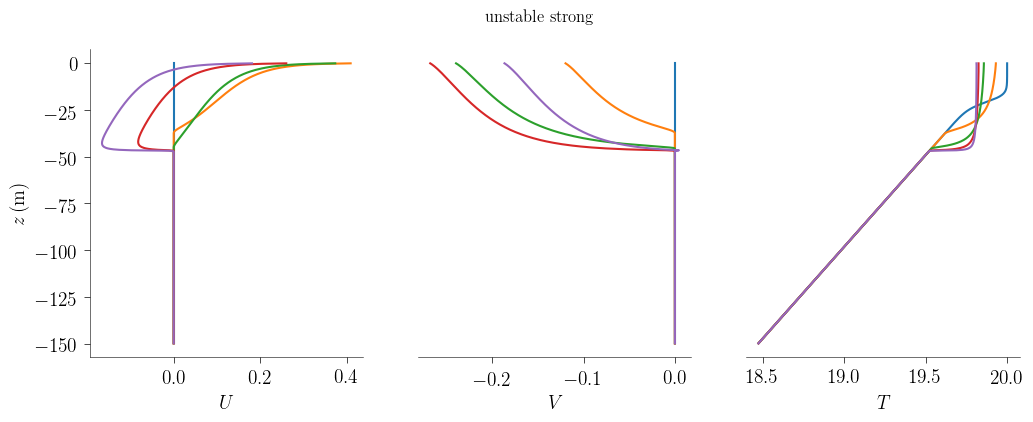

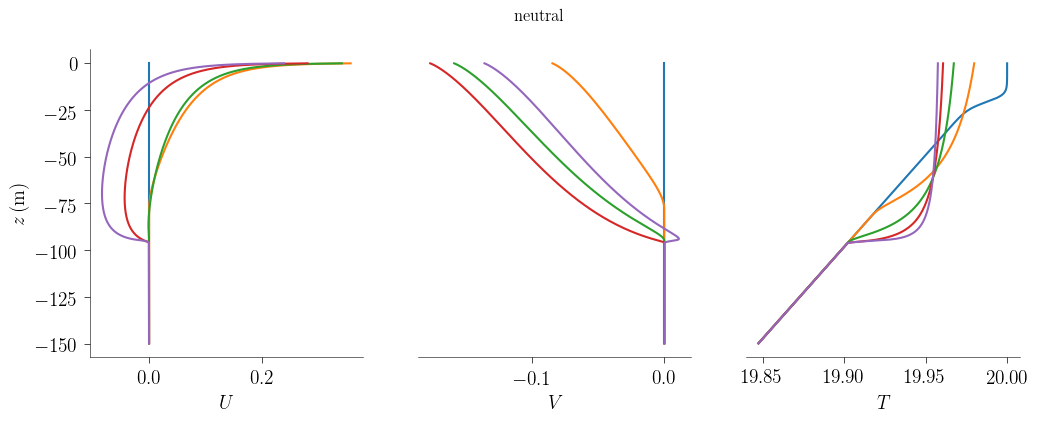

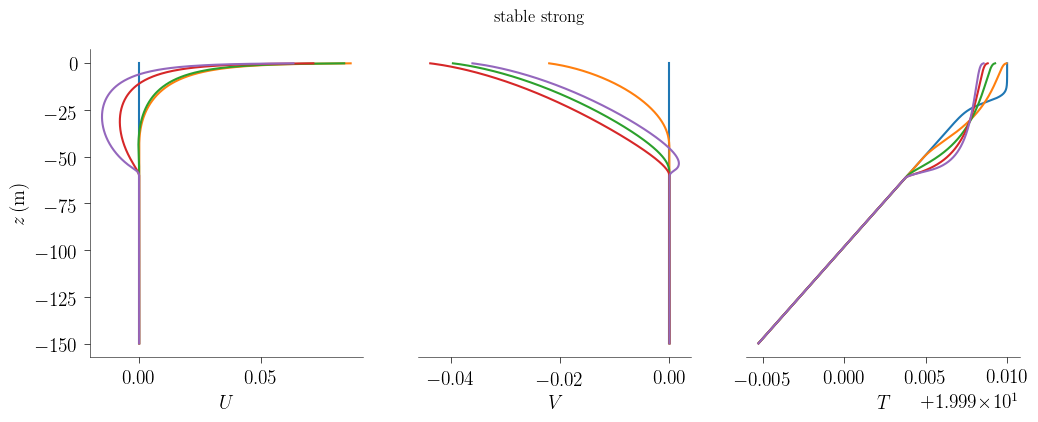

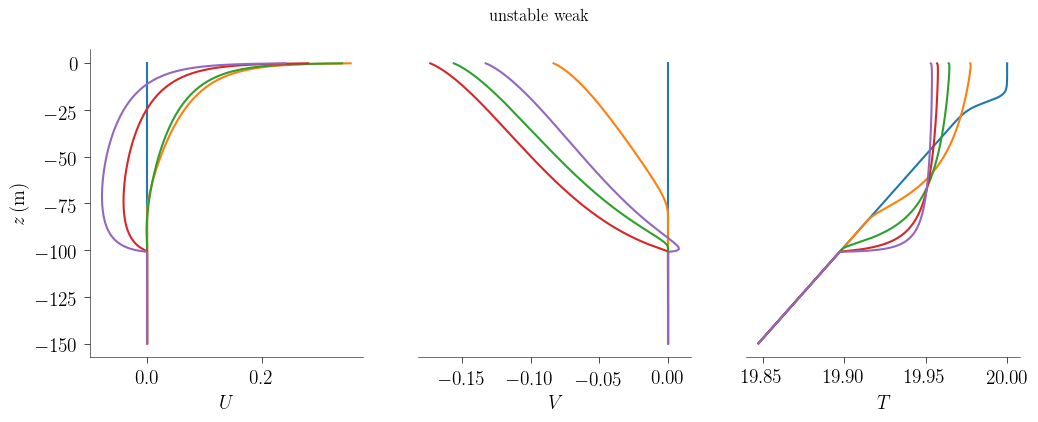

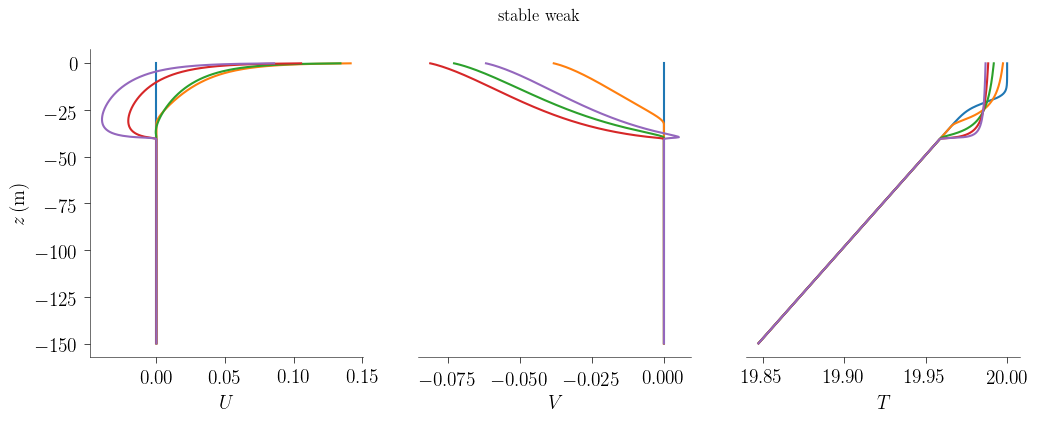

In [3]:
for (case, model) in models
    fig, axs = visualize_model(model, dout=3*hour, tfinal=12*hour)
    fig.suptitle(replace(case, "_" => " "))
end

In [4]:
for (case, model) in models
    @printf "Generating data for case %s..." case
    filepath = joinpath("..", "data", "perfect_model", "$case.jld2")
    @time generate_data(filepath, model; dout=1*hour, tfinal=2*day)
end 

Generating data for case unstable_strong...

ArgumentError: ArgumentError: a group or dataset named N is already present within this group